In [35]:
#Llamar al dataloader
%run DataLoader.ipynb

## Análisis de tweets repetidos

In [40]:
#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

grupo = dataset.fillna(value='NaN')

In [15]:
#Encontramos los tweets repetidos
grupo = grupo.groupby(['keyword', 'location', 'text', 'longitud', 'target']).agg({'text':'count'})
grupo.columns = ['repeticiones']
grupo = grupo.reset_index()

# Hacemos un pivot de la tabla para ver los resultados repetidos de mejor manera
grupo = grupo.pivot_table(index = ['keyword', 'location', 'text', 'longitud'],\
     columns = 'target', values = 'repeticiones', fill_value = 0)
grupo.columns = ['Falso', 'Verdadero']
grupo = grupo.reset_index()
grupo['Total'] = grupo.Falso + grupo.Verdadero
grupo = grupo[grupo.Total > 1]
grupo

count    36.000000
mean      2.694444
std       1.141914
min       2.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: Total, dtype: float64

In [16]:
#Repeticiones totales
grupo.Total.sum()

97

In [17]:
#Cantidad de veces que se reptite cada texto
grupo.text.value_counts().to_frame()

,text
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,2
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives: A group of villagers saved over 70 passengers' lives after two train...,1
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time,1
Caution: breathing may be hazardous to your health.,1
RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG,1
http://t.co/c1H7JECFrV @RoyalCarribean do your passengers know about the mass murder that takes place in the #FaroeIslands every year?,1
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,1
To fight bioterrorism sir.,1
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1


In [18]:
#Cantidad de textos distintos
grupo.text.value_counts().count()

35

In [19]:
grupo.keyword.value_counts().to_frame()

,keyword
hellfire,4
derailment,3
displaced,3
detonate,2
aftershock,2
injury,2
terrorist,1
floods,1
refugees,1
suicide%20bomb,1


In [20]:
grupo.keyword.value_counts().count()

26

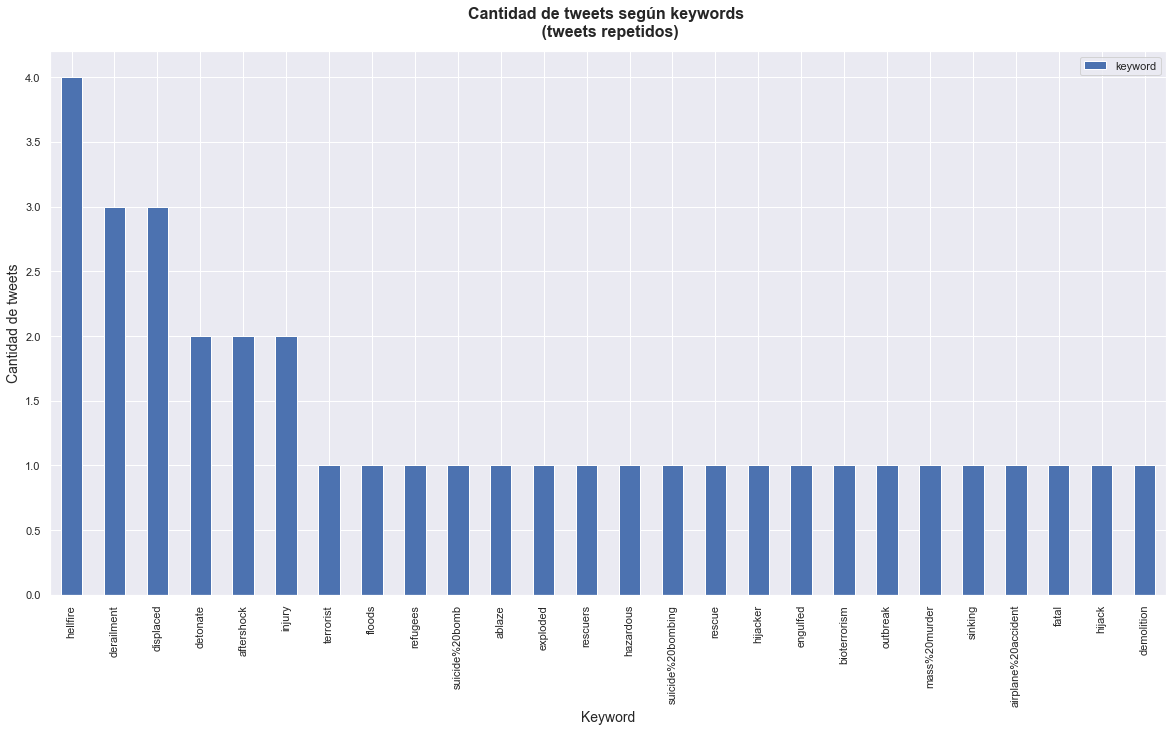

In [21]:

sns.set()
fig, ax = plt.subplots()
grupo.keyword.value_counts().to_frame().plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Keyword",fontsize=14)
ax.set_title('Cantidad de tweets según keywords \n (tweets repetidos)',\
             fontsize=16,fontweight='bold', pad = 15)
plt.show()
# fig.savefig('figure.png')

## Análisis de tweets repetidos por location y target

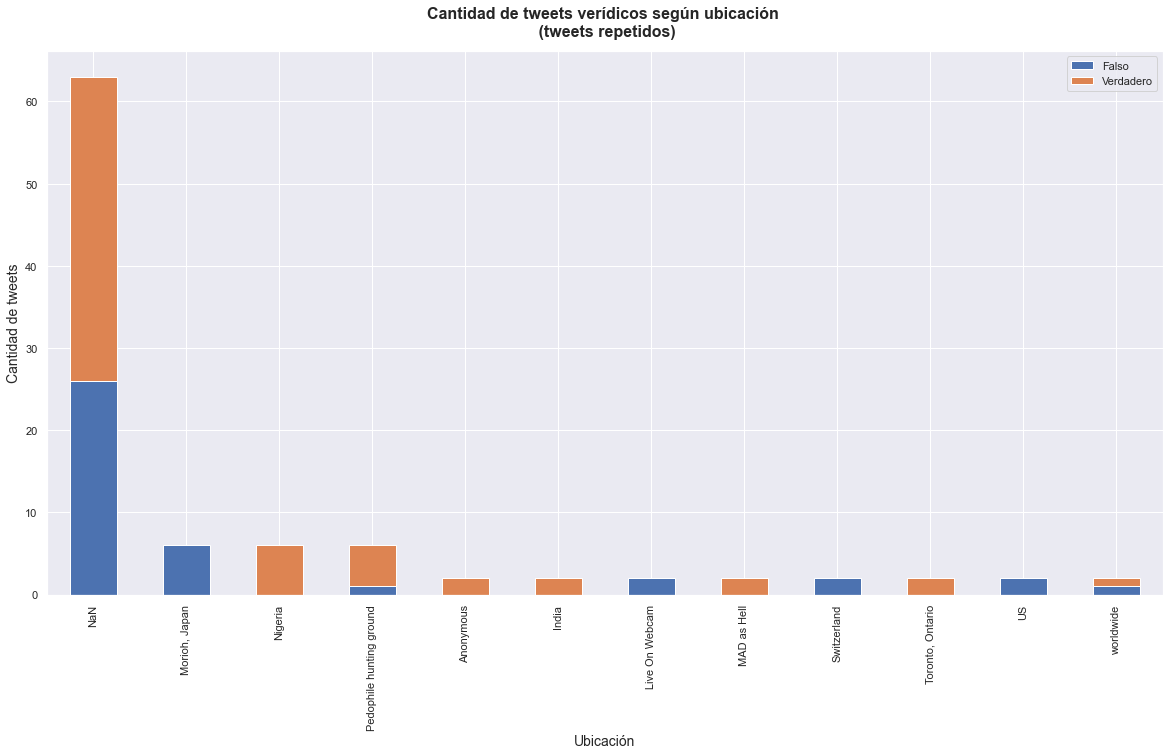

In [22]:
grupo1 = grupo.groupby('location').agg({'Falso': 'sum', 'Verdadero':'sum', 'Total' : 'sum'})
grupo1.columns = ['Falso', 'Verdadero', 'Total']
grupo1 = grupo1.sort_values(by = 'Total', ascending=False)
grupo1 = grupo1.drop(columns = ['Total'])


sns.set()
fig, ax = plt.subplots()
grupo1.plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Ubicación",fontsize=14)
ax.set_title('Cantidad de tweets verídicos según ubicación \n (tweets repetidos)',\
             fontsize=16,fontweight='bold', pad = 15)
plt.show()